In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from pandas import read_csv
import sys
import os
from matplotlib import rcParams
import toml

%load_ext autoreload
%autoreload 2

from correlations import *
from read_in_data import *
from mass_fit import *
from mass_matteo import *
from functions import *



In [7]:
param = ("physics", "mass")
simulations = []
for i in range(12,22):
    dataset = Dataset(4, 32)
    dataset.add_data("./data/thermal/mass_scan/conf" + str(i) + "/", param, 1)
    simulations.append(dataset)
    print(dataset.toml_params[param[0]][param[1]], dataset.toml_params["fermions"]["fermion_mass"])
'''for i in range(7,13):
    dataset = Dataset(16, 16)
    dataset.add_data("./data/thermal/T_low/conf" + str(i) + "/", param, 1)
    simulations.append(dataset)
    print(dataset.toml_params[param[0]][param[1]], dataset.toml_params["fermions"]["fermion_mass"])'''
'''for i in range(9,17):
    dataset = Dataset(4*(i-8), 32)
    dataset.add_data("./data/thermal/T2/conf" + str(i) + "/", param, 1)
    simulations.append(dataset)
    print(dataset.toml_params[param[0]][param[1]], dataset.toml_params["fermions"]["fermion_mass"])'''

-0.8999999999999999 0.01
-0.7999999999999998 0.01
-0.7 0.01
-0.5999999999999999 0.01
-0.5 0.01
-0.3999999999999999 0.01
-0.2999999999999998 0.01
-0.19999999999999996 0.01
-0.09999999999999987 0.01
0.0 0.01


'for i in range(9,17):\n    dataset = Dataset(4*(i-8), 32)\n    dataset.add_data("./data/thermal/T2/conf" + str(i) + "/", param, 1)\n    simulations.append(dataset)\n    print(dataset.toml_params[param[0]][param[1]], dataset.toml_params["fermions"]["fermion_mass"])'

<ErrorbarContainer object of 3 artists>

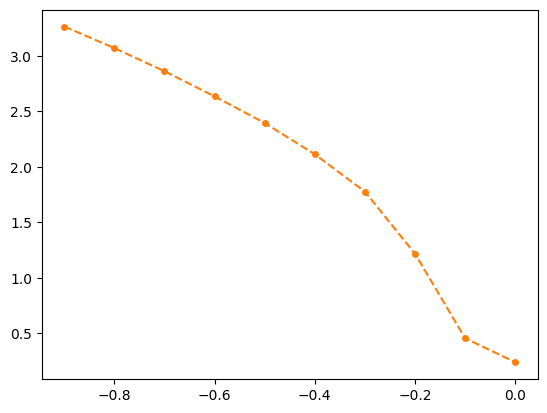

In [9]:
data = []
vals  = []
errs = []
params = []
for s in simulations:
    if s.Nt == 16 and s.toml_params[param[0]][param[1]] > 0.00:
        val, err = s.compute_susceptibility()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], vals, errs, fmt='o--', markersize=4, label=r"$N_x = 32$")

data = []
vals  = []
errs = []
params = []
for s in simulations:
    if s.Nt == 4:
        val, err = val, err = s.compute_abs_mag()
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], vals, errs, fmt='o--', markersize=4, label=r"$N_x = 32$")

16 2 0.9433731718265276
16 4 1.270054989514937
16 6 2.4718575903646625
16 8 3.2215027775905494
16 10 3.185580172985724
16 12 3.606331666787302
32 4 1.7167140402465717
32 8 3.1141755346505455
32 12 3.5103212712069007
32 16 3.6064742234326954
32 20 3.5993449394999373
32 24 3.6065033725277753
32 28 3.6418497692508764
32 32 3.6408727291913916
32 36 3.636396868404655
32 40 3.6355508618922268
32 44 3.6338962303517723
32 48 nan


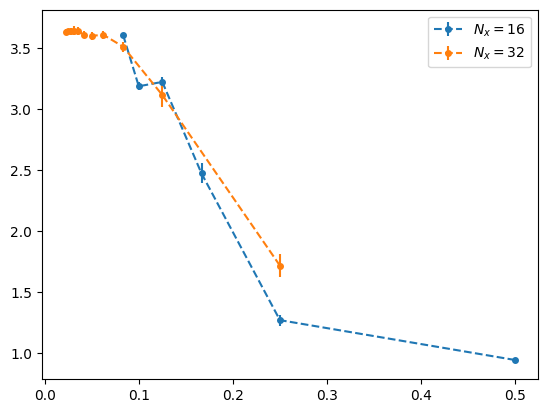

In [18]:
data = []
for s in simulations:
    if s.Nx == 16:
        val, err = s.compute_abs_mag()
        data.append((s.Nt, val, err))
        print(s.Nx, s.Nt, val)
        params, vals, errs = sort_data(data)
plt.errorbar([1/t for t in params], vals, errs, fmt='o--', markersize=4, label=r"$N_x = 16$")

data = []
for s in simulations:
    if s.Nx == 32:
        val, err = s.compute_abs_mag()
        print(s.Nx, s.Nt, val)
        data.append((s.Nt, val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([1/t for t in params], vals, errs, fmt='o--', markersize=4, label=r"$N_x = 32$")

plt.legend()


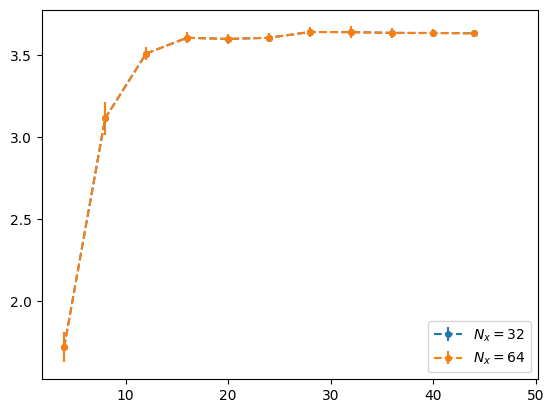

In [10]:
data = []
for s in simulations:
    if s.Nx == 64:
        val, err = s.compute_susceptibility()
        data.append((s.Nt, val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], vals, errs, fmt='o--', markersize=4, label=r"$N_x = 32$")

data = []
for s in simulations:
    if s.Nx == 128:
        val, err = s.compute_susceptibility()
        data.append((s.Nt/2, val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], vals, errs, fmt='o--', markersize=4, label=r"$N_x = 64$")

plt.legend()